In [2]:
import cv2
import random
import imutils
from glob import glob
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import matplotlib.pyplot as plt

In [3]:
dataset_path = 'Notes'
target_img_size = (100, 100)
sample_count = 50

In [4]:
def extract_raw_pixels(img):
    resized = cv2.resize(img, target_img_size)
    return resized.flatten()


In [5]:
def extract_hog_features(img):
    img = cv2.resize(img, target_img_size)
    win_size = (100, 100)
    cell_size = (4, 4)
    block_size_in_cells = (2, 2)

    block_size = (block_size_in_cells[1] * cell_size[1],
                  block_size_in_cells[0] * cell_size[0])
    block_stride = (cell_size[1], cell_size[0])
    nbins = 9  # Number of orientation bins
    hog = cv2.HOGDescriptor(win_size, block_size,
                            block_stride, cell_size, nbins)
    h = hog.compute(img)
    h = h.flatten()
    return h.flatten()

In [6]:
def extract_features(img, feature_set='raw'):
    if feature_set == 'hog':
        return extract_hog_features(img)
    else:
        return extract_raw_pixels(img)

In [7]:
def get_folder_names(directory):
    folder_names = []
    for root, dirs, files in os.walk(directory):
        for name_dir in dirs:
            folder_names.append(name_dir)
    return folder_names

In [8]:
folder_list = get_folder_names('Notes')
print(folder_list)
print(len(folder_list))

['Eight', 'Half', 'Quarter', 'Sixteenth', 'Whole']
5


In [9]:
def load_dataset(feature_set='raw', dir_names=[]):
    features = []
    labels = []
    count = 0
    for dir_name in dir_names:
        print(dir_name)
        imgs = glob(f'{dataset_path}/{dir_name}/*.jpg')
        count += len(imgs)
        subset = random.sample([i for i in range(len(imgs))], min(len(imgs), sample_count))
        for i in subset:
            img = cv2.imread(imgs[i])
            labels.append(dir_name)
            features.append(extract_features(img, feature_set))
    print(f'Total: {len(dir_names)} directories, and {count} images')
    return features, labels

In [10]:
def load_classifiers():
    random_seed = 42
    random.seed(random_seed)
    np.random.seed(random_seed)

    classifiers = {
        'SVM': svm.LinearSVC(random_state=random_seed),
        'KNN': KNeighborsClassifier(n_neighbors=7),
        'NN': MLPClassifier(activation='relu', hidden_layer_sizes=(200,),
                            max_iter=10000, alpha=1e-4,
                            solver='adam', verbose=20,
                            tol=1e-8, random_state=1,
                            learning_rate_init=.0001,
                            learning_rate='adaptive')
    }
    return classifiers, random_seed

In [21]:
def run_experiment(classifier='SVM', feature_set='hog', dir_names=[]):
    print('Loading dataset. This will take time ...')
    features, labels = load_dataset(feature_set, dir_names)
    print('Finished loading dataset.')

    classifiers, random_seed = load_classifiers()

    train_features, test_features, train_labels, test_labels = train_test_split(
        features, labels, test_size=0.2, random_state=random_seed)

    model = classifiers[classifier]
    print('############## Training', classifier, "##############")
    model.fit(train_features, train_labels)
    accuracy = model.score(test_features, test_labels)
    print(classifier, 'accuracy:', accuracy*100, '%')

    return model, accuracy, test_features, test_labels

In [22]:
svm_model , svm_acc, svm_test_f, svm_test_l =run_experiment('SVM', 'hog', folder_list )

Loading dataset. This will take time ...
Eight
Half
Quarter
Sixteenth
Whole
Total: 5 directories, and 5000 images
Finished loading dataset.
############## Training SVM ##############
SVM accuracy: 80.0 %


In [ ]:
predict_test_lable = svm_model.predict

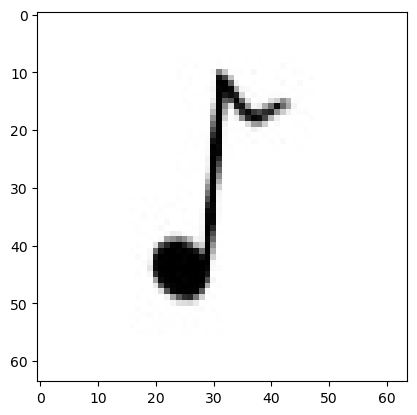

In [20]:
test_image = cv2.imread("Notes/Eight/e1.jpg")
plt.imshow(test_image)

In [17]:
test_hog_features = extract_hog_features(test_image)

In [19]:
note_name = svm_model.predict([test_hog_features])
note_name

array(['Eight'], dtype='<U9')